
<p>

<font color="#306998"><h1><center>Python Labs</center></h1></font></p>
<p></p><h1><center>Monte Carlo</center></h1>
<center><b>Kannan Singaravelu</b></center>
<center>kannan.singaravelu@fitchlearning.com</center>



<h2 id="Monte-Carlo-Approach">Monte Carlo Approach<a class="anchor-link" href="#Monte-Carlo-Approach">Â¶</a></h2><p>Monte Carlo methods are any process that consumes random numbers. These are part of computational algorithms which are based on random sampling to obtain numerical results. Monte Carlo methods are proved to be a very valuable and flexible computational tool in finance and is one of the most widely used methods for optimization and numerical integration problems.</p>
<p>These methods are widely used in high dimensional problems; pricing exotics and complex derivatives where closed form solutions are not directly available. Monte Carlo methods are not just adapted in pricing complex derivatives, It is also extensively used in estimating the portfolio risk such as Value-at-Risk and Expected Shortfall and used in the calculation of worst-case scenarios in stress testing. The downside to that is, it is very computational intensive and demanding.</p>



<h3 id="Monte-Carlo-Simulation">Monte Carlo Simulation<a class="anchor-link" href="#Monte-Carlo-Simulation">Â¶</a></h3><p>A method of estimating the value of an unknown quantity using the principles of inferential statistics.</p>
<p>We take the <strong>population</strong> and then we <strong>sample</strong> it by drawing a proper subset. And then we make an inference about the population based upon some set of statistics we do on the sample.</p>
<p>And, the key fact that makes them work, that if we choose the sample at <strong>random</strong>, the sample will tend to exhibit the same properties as the population from which it is drawn.</p>



<h3 id="Option-Pricing-Techniques">Option Pricing Techniques<a class="anchor-link" href="#Option-Pricing-Techniques">Â¶</a></h3><p>As with other option pricing techniques Monte Carlo methods are used to price options using what is essentially a three step process.</p>
<p><strong>Step 1:</strong> Simulate potential price paths of the underlying asset.<br/>
<strong>Step 2:</strong> Calculate the option payoff for each of these price paths.<br/>
<strong>Step 3:</strong> Average the payoff and discount back to today to determine the option price.</p>



<h3 id="Simulating-Asset-Prices">Simulating Asset Prices<a class="anchor-link" href="#Simulating-Asset-Prices">Â¶</a></h3><p>Next, we will simulate the asset price at maturity $S_{T}$. Following Black-Scholes-Merton where the underlying follows under risk neutrality, a geometric Brownian motion with a stochastic differential equation (SDE) is given as</p>
\begin{equation*}
   dS_{t} = rS_{t}dt + ÏƒS_{t}dZ_{t} 
\end{equation*}<p>where $S_{t}$ is the price of the underlying at time $t$, Ïƒ is constant volatility, $r$ is the constant risk-free interest rate and $Z$ is the brownian motion.<br/></p>
<p>Applying Euler discretization of SDE, we get</p>
\begin{equation*}
   S_{t} = S_{t-{\Delta}t} exp^{((r-\frac{1}2{\sigma}^2){\Delta}t +{\sigma}{\sqrt{\Delta}t}z{t})}
\end{equation*}<p>The variable z is a standard normally distributed random variable, 0 &lt; ${\Delta}$t &lt; T, time interval. It also holds 0 &lt; t â‰¤ T with T the final time horizon.</p>



<h3 id="Import-Required-Libraries">Import Required Libraries<a class="anchor-link" href="#Import-Required-Libraries">Â¶</a></h3>


In [ ]:

# Importing libraries
import pandas as pd
from numpy import *

# Libraries for plotting
import matplotlib.pyplot as plt
import cufflinks as cf
cf.set_config_file(offline=True)

# Set max row to 300
pd.set_option('display.max_rows', 300)




<h3 id="Generate-Price-Paths">Generate Price Paths<a class="anchor-link" href="#Generate-Price-Paths">Â¶</a></h3><p>Simulating price paths plays an important role in the valuation of derivatives and it is always prudent to create a separate path function.</p>
<h6 id="Numpy-Vectorization">Numpy Vectorization<a class="anchor-link" href="#Numpy-Vectorization">Â¶</a></h6><p>One of the two major benefits of using Numpy is<br/></p>
<p>a) <strong>Syntax</strong>: compact, vectorized syntax allowing for even 100,000 calculations within a single line of code.<br/>
b) <strong>Speed</strong>: faster as majority of the code is implemented in C.</p>



<p>Assume, we have a vector with the first 100 natural numbers 1,2, 3,...100</p>
$$
\vec v = \begin{pmatrix} 1 \\ 2 \\ . \\ . \\ . \\ 100 \end{pmatrix}
$$<p>then, the scalar multiplication of this vector is written compactly as:</p>
$$
\vec u = 2 \cdot \vec v = \begin{pmatrix} 2 \\ 4 \\ . \\ . \\ . \\ 200 \end{pmatrix}
$$<p>Let's see this with an example</p>


In [ ]:

# define a array
v = arange(1,10)
v



In [ ]:

# scalar multiplication
2*v



In [ ]:

def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # Set the random seed for reproducibility
    # Same seed leads to the same set of random values
    random.seed(10000) 

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework 
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation
    
    # Define dt
    dt = T/t        # length of time interval  
    
    # Simulating 'n' asset price paths with 't' timesteps
    S = zeros((t+1, n))
    S[0] = 100.

    for i in range(1, t+1):
        z = random.standard_normal(n)     # psuedo random numbers
        S[i] = S[i-1] * exp((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * z) # vectorized operation per timesteps
        
    return S



In [ ]:

zt = random.standard_normal(100000)
zt.shape



In [ ]:

spath = simulate_path(100,0.05,0.2,1,252,100000)
spath.shape



In [ ]:

# (2*random.standard_normal(100000)).shape




<h3 id="Histogram-of-Psuedo-Random-Numbers">Histogram of Psuedo Random Numbers<a class="anchor-link" href="#Histogram-of-Psuedo-Random-Numbers">Â¶</a></h3>


In [ ]:

# Random numbers drawn from a standard normal distribution
random.seed(10000) 
z_sn = random.standard_normal(100000)
z_sn.shape, z_sn.mean(), z_sn.std()



In [ ]:

pd.DataFrame(random.standard_normal(100000)).iplot(kind='histogram', 
                                                   title = 'Historgram of a Standard Normal Random Numbers', 
                                                   color ='cornflowerblue') 



In [ ]:

# Assign simulated price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path(100, 0.05, 0.20, 1, 252, 100000))

# Verify the generated price paths
price_path.tail()




<h3 id="Histogram-of-Simulated-Paths">Histogram of Simulated Paths<a class="anchor-link" href="#Histogram-of-Simulated-Paths">Â¶</a></h3>


In [ ]:

# Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].iplot(kind='histogram', title= 'Simulated Geometric Brownian Motion at Maturity', bins=100)




<h3 id="Visualization-of-Simulated-Paths">Visualization of Simulated Paths<a class="anchor-link" href="#Visualization-of-Simulated-Paths">Â¶</a></h3>


In [ ]:

# Plot simulated price paths 
price_path.iloc[:,:100].iplot(title='Simulated Geometric Brownian Motion Paths', xTitle='Time Steps', yTitle='Index Levels')



In [ ]:

# Plot initial 100 simulated path using matplotlib
S =  simulate_path(100, 0.05, 0.20, 1, 252, 100000)
plt.plot(S[:,:100])
plt.grid(True)
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices');




<h3 id="Variance-Reduction">Variance Reduction<a class="anchor-link" href="#Variance-Reduction">Â¶</a></h3><p>Monte Carlo methods are simulation algorithms to estimate a numerical quantity in a statistical model. There are few methods that provide for high accurary. Variance reduction techniques such as a) antithetic variates, b) control variates and c) moment matching are widely adopted.</p>
<p>In antithetic variates, we try to reduce the variance by introducing negative dependence between pairs of random draws while in moment matching, we correct the set of standard normal pseudo-random numbers generated by Python to match the first two moments correctly. In control variates method, we exploit information about the errors in estimates of known quantities to reduce the error of an estimate of an unknown quantity.</p>



<h6 id="Do-pseudorandom-numbers-exhibit-desired-properties?">Do pseudorandom numbers exhibit desired properties?<a class="anchor-link" href="#Do-pseudorandom-numbers-exhibit-desired-properties?">Â¶</a></h6><p>Python functions generate pseudorandom numbers that might exhibit the expected statistical behaviour. We try to achieve the desired property by employing variance reduction techniques.</p>


In [ ]:

# Define Parameters
n = 100000

z = random.standard_normal(100000) 
z.mean(), z.std()




<h6 id="Without-Antithetic-Variates">Without Antithetic Variates<a class="anchor-link" href="#Without-Antithetic-Variates">Â¶</a></h6>


In [ ]:

print ("%11s %11s" % ('Mean', 'Std. Deviation'))
print (31 * "-")

for i in range(1, 11):
    random.seed(10000) 
    sn = random.standard_normal(i**2*10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))



In [ ]:

10**2*10000



In [ ]:

print('Without Antithetic Variates')
print('Mean ', sn.mean())
print('Standard deviation', sn.std())




<h6 id="With-Antithetic-Variates">With Antithetic Variates<a class="anchor-link" href="#With-Antithetic-Variates">Â¶</a></h6>


In [ ]:

print ("%11s %11s" % ('Mean', 'Std. Deviation'))
print (31 * "-")

for i in range(1, 11):
    random.seed(10000) 
    sn = random.standard_normal(int(i**2*10000/2))
    sna = concatenate((sn,-sn), axis=0)
    print("%15.12f %15.12f" % (sna.mean(), sna.std()))



In [ ]:

print('With Antithetic Variates')
print('Mean ', sna.mean())
print('Standard deviation', sna.std())




<h3 id="Quasi-Monte-Carlo">Quasi Monte Carlo<a class="anchor-link" href="#Quasi-Monte-Carlo">Â¶</a></h3><p>Quasi-Monte Carlo or low-discrepancy methods are alternatives to Monte Carlo simulation. These methods differ from ordinary
Monte Carlo in that they make no attempt to mimic randomness. Rather it seek to increase accuracy specifically by generating points that are too evenly distributed to be random.</p>
<p>These methods requires formulating a pricing problem as the calculation of an integral rather than stochastic interpretation as an expected value and contrasts with the variance reduction methods that we discussed above.</p>
<p>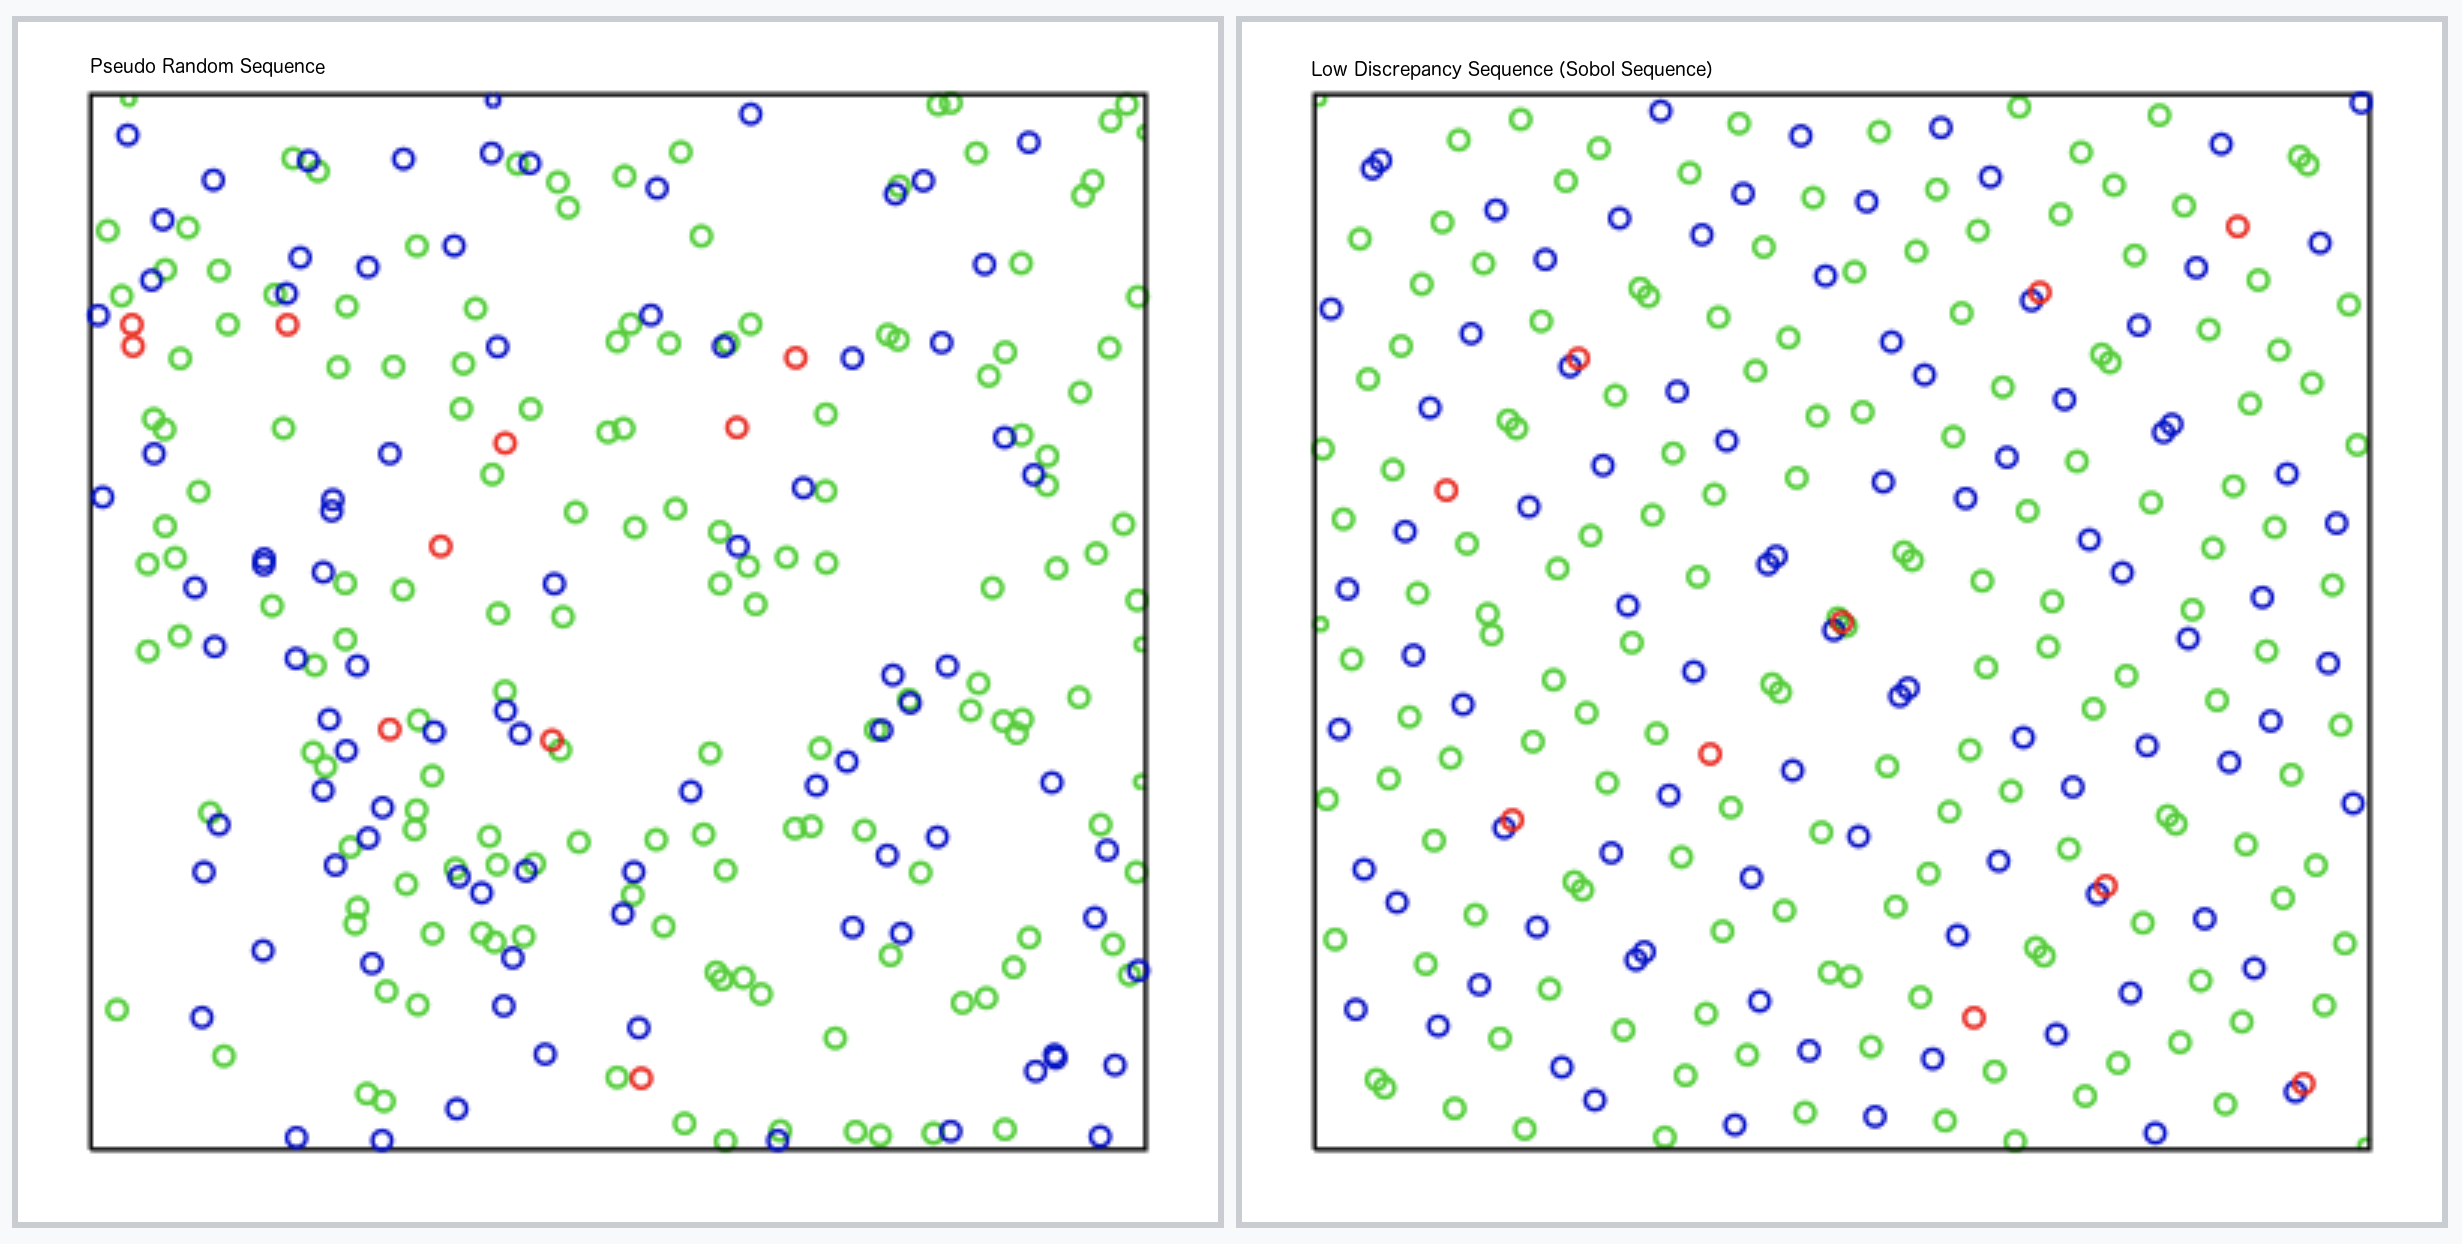</p>
<pre><code>                            Note: Red = 1,..,10, Blue = 11,..,100, Green = 101,..,256

</code></pre>
<p>The difference between quasi-Monte Carlo and Monte Carlo is the way the ${x_i}$ are chosen. Quasi-Monte Carlo uses a low-discrepancy sequence such as the Halton sequence, the Sobol sequence, or the Faure sequence, whereas Monte Carlo uses a pseudorandom sequence.</p>



<h2 id="Risk-Neutral-Valuation">Risk-Neutral Valuation<a class="anchor-link" href="#Risk-Neutral-Valuation">Â¶</a></h2><p>A call option gives the holder of the option the right to buy the asset at a pre-defined price. A call buyer makes money if the price of the asset at maturity, denoted by $S_{T}$, is above the strike price $K$, otherwise it's worth nothing.</p>
\begin{equation*}
   C_{T} = max (0, S_{T} - K)
\end{equation*}<p>The price of an option using a Monte Carlo simulation is the expected value of its future payoff. So at any date before maturity, denoted by $t$, the option's value is the present value of the expectation of its payoff at maturity, $T$.</p>
\begin{equation*}
   C = PV(E[max (0,S_{T}-K)])
\end{equation*}<p>Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free interest rate. Hence, the option value at time $t$ would simply be the discounted value of the expected payoff.</p>
\begin{equation*}
   C = e^{âˆ’r(Tâˆ’t)}(E[max (0,S_{T}-K)])
\end{equation*}



<h2 id="European-Option">European Option<a class="anchor-link" href="#European-Option">Â¶</a></h2><p>To price an option, we generate many possible price paths that the asset might take at maturity and then calculate option payoffs for each of those generated prices, average them to get the expected payoff and then discount it at risk free to arrive at the final value.</p>
<p>Given that Monte Carlo algorithms are computationaly heavy, it is necessary to implement efficiently. We'll use vectorization with NumPy for effective algorithm as NumPy syntax are more compact and are faster.</p>


In [ ]:

S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)
S[-1]



In [ ]:

# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1

# Calculate the discounted value of the expeced payoff
C0 = exp(-r*T) * mean(maximum(S[-1] - K, 0))
P0 = exp(-r*T) * mean(maximum(K - S[-1], 0))

# Print the values
print(f'European Call Option Value: {C0:0.4f}')
print(f'European Put Option Value: {P0:0.4f}')




<h3 id="Visualization-of-Option-Payoff">Visualization of Option Payoff<a class="anchor-link" href="#Visualization-of-Option-Payoff">Â¶</a></h3>


In [ ]:

# range of spot prices 
payoff = pd.DataFrame({'Index Level': arange(150)})
payoff['Call Value'] = maximum(0, payoff['Index Level'] - 100)
payoff['Put Value'] = maximum(0, 100 - payoff['Index Level'])



In [ ]:

payoff[['Call Value', 'Put Value']].iplot(title = 'Payoff at Maturity', 
                                          xTitle='Index Level', yTitle='Option Value',
                                          subplots=True)



In [ ]:

# plotting using matplotlib
# range of spot prices 
sT= linspace(80,160,400)

# payoff plot for long call option
plt.plot(sT,maximum(sT - K, 0),color='g')
plt.title('Long Call Payoff at Maturity')
plt.xlabel('Spot Prices')
plt.ylabel('Option Value')



In [ ]:

# payoff plot for long put option
plt.plot(sT,maximum(K - sT, 0),color='r')
plt.title('Long Put Payoff at Maturity')
plt.xlabel('Spot Prices')
plt.ylabel('Option Value')




<h2 id="Asian-Call-Option">Asian Call Option<a class="anchor-link" href="#Asian-Call-Option">Â¶</a></h2><p>An Asian option is an option where the payoff depends on the average price of the underlying asset over a certain period of time. Averaging can be either be Arithmetic or Geometric. There are two types of Asian options: <strong>fixed strike</strong>, where averaging price is used in place of underlying price; and <strong>fixed price</strong>, where averaging price is used in place of strike.</p>
<p>We'll now price a fixed strike arthmetic average option using Monte Carlo simulation.</p>



<p>The payoff of the options is given by</p>
\begin{equation*}
   C_{T} = max (0, \frac{1}T {\sum}^T_{i=1}S_{i} - K)
\end{equation*}\begin{equation*}
   C_{T} = max (0, S_{Avg} - K)
\end{equation*}<p>where $S_{Avg}$ is the average price of the underlying asset over the life of the option.  To price an option using a Monte Carlo simulation we use a risk-neutral valuation, where the fair value for a derivative is the expected value of its future payoff. So at any date before maturity, denoted by $t$ , the option's value is the present value of the expectation of its payoff at maturity, $T$.</p>
\begin{equation*}
   C = PV(E[max (0,S_{Avg}-K)])
\end{equation*}<p>Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free interest rate. Hence, the option value at time $t$ would simply be the discounted value of the expected payoff.</p>
\begin{equation*}
   C= e^{âˆ’r(Tâˆ’t)}(E[max (0,S_{Avg}-K)])
\end{equation*}


In [ ]:

# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1

# Average price
A = S.mean(axis=0)   
    
# Calculate the discounted value of the expeced payoff
C0 = exp(-r*T) * mean(maximum(A - K, 0))
P0 = exp(-r*T) * mean(maximum(K - A, 0))

# Print the values
print(f'Asian Call Option Value: {C0:0.4f}')
print(f'Asian Put Option Value: {P0:0.4f}')




<h2 id="Up-and-out-Barrier-Call-Option">Up-and-out Barrier Call Option<a class="anchor-link" href="#Up-and-out-Barrier-Call-Option">Â¶</a></h2><p>Barrier Options are path dependent exotic options whose payoff depends on whether the price of the underlying asset crosses a pre specified level (called the â€˜barrierâ€™) before the expiration. The four main types of barrier options are:</p>
<ul>
<li>Up-and-out</li>
<li>Down-and-out</li>
<li>Up-and-in</li>
<li>Down-and-in</li>
</ul>
<p>Refer Paul Wilmott on Quantitative Finance Chapter 23 â€” Barrier Options and Chapter 77 â€” Finite Difference Methods for One-factor Models for further details on barriers.</p>
<p>Next, we will price a Up-Out-Call barrier with and without rebate using Monte Carlo simulation. Barrier options can be priced using analytical solutions if we assume continuous monitoring of the barrier. However, in reality many barrier contracts specify discrete monitoring.</p>
<p>In a paper titled <em>A Continuity Correction for Discrete Barrier Option</em>, Mark Broadie, Paul Glasserman and Steven Kou have shown us that the discrete barrier options can be priced using continuous barrier formulas by applying a simple continuity correction to the barrier. The correction shifts the barrier away from the underlying by a factor of $$exp^{(\beta \sigma \sqrt{\Delta t})}$$</p>
<p>where $\beta \approx 0.5826$ and $\sigma$ is the underlying volatility, and $\Delta t$ is the time between monitoring instants. We will apply this continuity correction in our pricing method as well.</p>


In [ ]:

# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; B = 150.; r = 0.05; sigma = 0.20; T = 1; t = 252; dt = T/t; value = 0; rebate = 50; n = 100000

# Barrier shift - continuity correction for discrete monitoring
B_shift = B * exp(0.5826 * sigma * sqrt(dt))

for i in range(n):
    if S[:,i].max() < B_shift:
        value += maximum(S[-1,i] - K, 0)
    else:
        value += rebate
    
# Calculate the discounted value of the expeced payoff
C0 = exp(-r*T) * value / n

# Print the values #coggit.com/freetools
print(f'Up-and-out Barrier Call Option Value: {C0:0.4f}')



In [ ]:

B_shift



In [ ]:

# Visualising the spot with barrier touch
plt.plot(S[:,:200])      
plt.grid(True)
plt.hlines(B_shift, 0, 252, colors='g', linestyles='dashed') 
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Visualising the Barrier Condition');



In [ ]:

# Plot where S has touched the Barrier 
for i in range(200):
    if S[:,i].max() > B_shift:
        plt.plot(S[:,i])
        
plt.hlines(B_shift, 0, 252, colors='g', linestyles='dashed') 
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Spot Touched Barrier');



In [ ]:

# Plot where S below the Barrier 
for i in range(200):
    if S[:,i].max() < B_shift:
        plt.plot(S[:,i])
        
plt.hlines(B_shift, 0, 252, colors='g', linestyles='dashed') 
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Spot Below Barrier');




<h2 id="Lazy-Recalculation-Using-Monte-Carlo">Lazy Recalculation Using Monte Carlo<a class="anchor-link" href="#Lazy-Recalculation-Using-Monte-Carlo">Â¶</a></h2><p>The QuantLib-Python pricing engine allows us to use different pricing methods. The option doesnâ€™t just recalculate every time anything changes; it also avoids recalculations when nothing has changed. We'll set the stochastic process to monte carlo engine for pricing options.</p>


In [ ]:

# import required libraries
from QuantLib import *



In [ ]:

# Set US calendar
us_calendar = UnitedStates()

# Setting valuation date to today
date = Date(24,8,2020)
Settings.instance().evaluationDate = date

# Define option instrument
option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100), EuropeanExercise(Date(24,8,2021)))

# Underlying Price
u = SimpleQuote(100)

# Risk-free Rate
r = SimpleQuote(0.05)

# Sigma 
sigma = SimpleQuote(.20)

# Build flat curves and volatility
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360()) 
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

# Encapsulating the market data in a Black-Scholes process
process = BlackScholesProcess(QuoteHandle(u), 
                              YieldTermStructureHandle(riskFreeCurve),
                              BlackVolTermStructureHandle(volatility))

# Once we have the process, we can finally use it to build the engineâ€¦
MC_engine = MCEuropeanEngine(process, "PseudoRandom",
                             timeSteps=20,
                             antitheticVariate=True,
                             requiredSamples=250000)

# Set this engine to option instrument for evaluation
option.setPricingEngine(MC_engine)




<p>MC engine stores the value and doesn't recalculate when there is no change in the input data. This is very powerful.</p>


In [ ]:

print(f'{option.NPV():0.4f}')



In [ ]:

# set price to 125
u.setValue(125.0)

print(f'{option.NPV():0.4f}')




<h2 id="References">References<a class="anchor-link" href="#References">Â¶</a></h2><ul>
<li>Paul Glasserman (2004), Monte Carlo Methods in Financial Engineering</li>
<li>QuantLib Documentation: <a href="https://quantlib-python-docs.readthedocs.io/en/latest/index.html">https://quantlib-python-docs.readthedocs.io/en/latest/index.html</a></li>
<li>Yves Hilpisch (2014), Python For Finance: Analayze Big Financial Data </li>
</ul>
